# Final Round analysis notebook
In this notebook, we are going to do some data analysis given in the final round of the Cascade Cup.

In [21]:
# importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# importing dataset
df = pd.read_csv('modified-data.csv')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [23]:
# columns description
from IPython.display import IFrame
IFrame('Column Description.pdf',width=600,height=600)

Our target is absenteeism time in hours, so most of the analysis will be done on to find the relation between different features and the target variable.

In [24]:
# breif information about the data
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [25]:
# checking null values 
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

No null values, hence it will be easier for doing analysis.

In [26]:
# seeing the no. of unique absenteeism hours
df['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

The absentee hours don't seem to be from a fixed bunch, hence this should be taken as a regeression problem.

In [27]:
import os
os.sep

'\\'

In [28]:
# function to save figure
def save_figure(fig,name):
    path = os.path.join(os.getcwd(),name)
    fig.savefig(path)

[Text(0.5, 0, 'Transportation expense'),
 Text(0, 0.5, 'Absenteeism time(in hours)')]

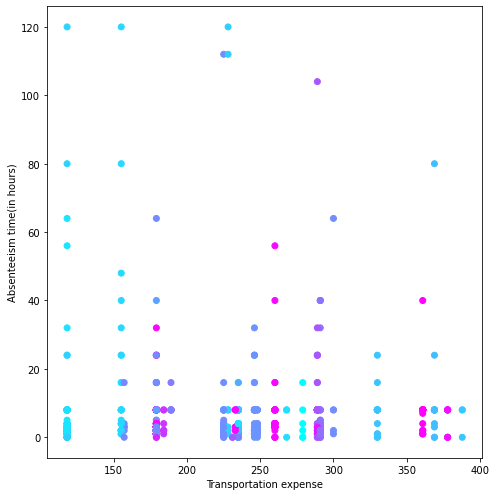

In [29]:
# relation between transportaion cost and absentee hours, w.r.t. distance b/w office and home
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Transportation expense'],df['Absenteeism time in hours'],c=df['Distance from Residence to Work'],cmap='cool')
ax.set(xlabel = 'Transportation expense',
       ylabel = 'Absenteeism time(in hours)')
#save_figure(fig,'transportation-expense-absentee-hours-relation.png');

The plot shows that most of the people who have higher transportation expenses, usually live far from the office. But, employees who spend more than 200 usually have slightly less absenteeism hours, generally speaking, not more than 60.

In [30]:
# no. of people with disciplinary failures
df['Disciplinary failure'].value_counts()

0    700
1     40
Name: Disciplinary failure, dtype: int64

Text(0.5, 0, 'Work load Average/day')

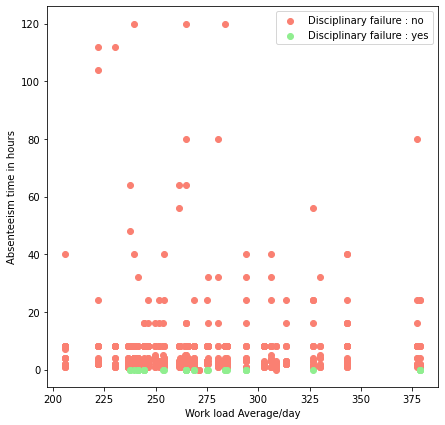

In [31]:
# relation between work load and absentee hours w.r.t. disciplinary failure
plt.figure(figsize=(7,7))
n = plt.scatter(df['Work load Average/day '][df['Disciplinary failure']==0],df['Absenteeism time in hours'][df['Disciplinary failure']==0],color='salmon')
y = plt.scatter(df['Work load Average/day '][df['Disciplinary failure']==1],df['Absenteeism time in hours'][df['Disciplinary failure']==1],color='lightgreen')
plt.legend((n,y),('Disciplinary failure : no','Disciplinary failure : yes'),loc = 'upper right')
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Work load Average/day')
#plt.savefig('plots\workload-absentee-hours.png')

A lot of people don't commit disciplinary failures, and those who do have a workload average in the range similar to that of their counterparts. Also, employees who do more absents do no commit disciplinary failures.

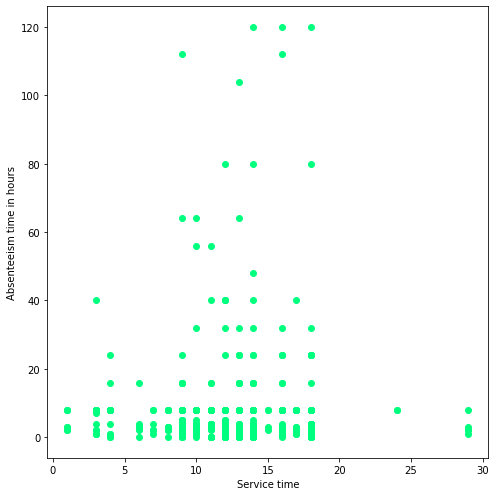

In [32]:
# relation of absentee hours and service time
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Service time'],df['Absenteeism time in hours'],color='springgreen')
ax.set(xlabel='Service time',
       ylabel='Absenteeism time in hours');
#save_figure(fig,'service-time-absentee-hours.png')

It is clear that employees who have service time in the range 5-20 have higher absenteeism time. This must be a highly correlated feature.

In [33]:
df['Hit target'].value_counts()

93     105
99     102
97      89
92      79
96      75
95      75
98      66
91      45
94      34
88      28
81      19
87      12
100     11
Name: Hit target, dtype: int64

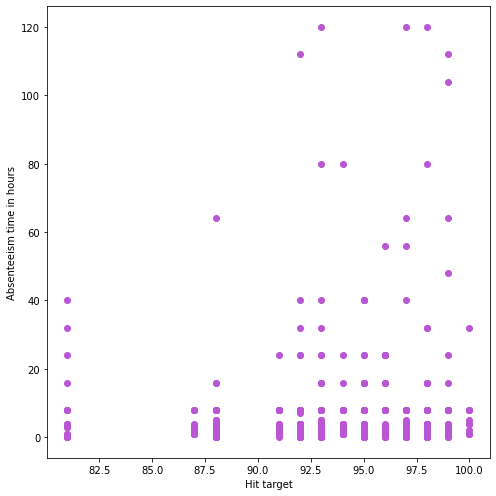

In [34]:
# relation of hit target and absentee hours
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Hit target'],df['Absenteeism time in hours'],color='mediumorchid')
ax.set(xlabel='Hit target',
      ylabel='Absenteeism time in hours');
#save_figure(fig,'hit-target-absentee-hours.png')

People of hit target more often tend to have more absenteeism hours, one of the reasons might be that these employees may be skipping office to do their office tasks.

Text(0.5, 0, 'Hit Target')

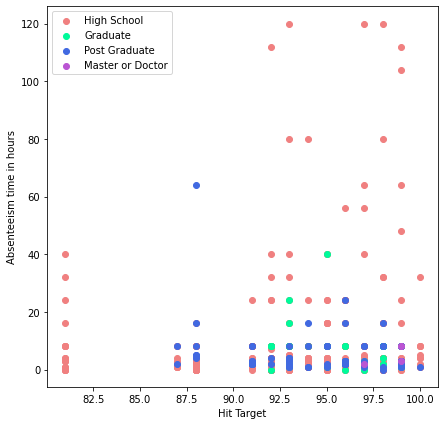

In [35]:
# relation of hit target and absentee hours w.r.t. education level
plt.figure(figsize=(7,7))
high = plt.scatter(df['Hit target'][df['Education']==1],df['Absenteeism time in hours'][df['Education']==1],color='lightcoral')
grad = plt.scatter(df['Hit target'][df['Education']==2],df['Absenteeism time in hours'][df['Education']==2],color='mediumspringgreen')
post_grad = plt.scatter(df['Hit target'][df['Education']==3],df['Absenteeism time in hours'][df['Education']==3],color='royalblue')
doc = plt.scatter(df['Hit target'][df['Education']==4],df['Absenteeism time in hours'][df['Education']==4],color='mediumorchid')
plt.legend((high,grad,post_grad,doc),('High School','Graduate','Post Graduate','Master or Doctor'),loc = 'upper left')
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Hit Target')
#plt.savefig('plots\hit-target-absentee-hours-education-level.png')

This plot shows that most of the high-school educated employees who hit target often have significantly more absenteeism hours than other employees. Also, employees who have graduate or above level education hit target more often and have way less absenteeism hours.

[Text(0.5, 0, 'Number of pets'), Text(0, 0.5, 'Absenteeism time in hours')]

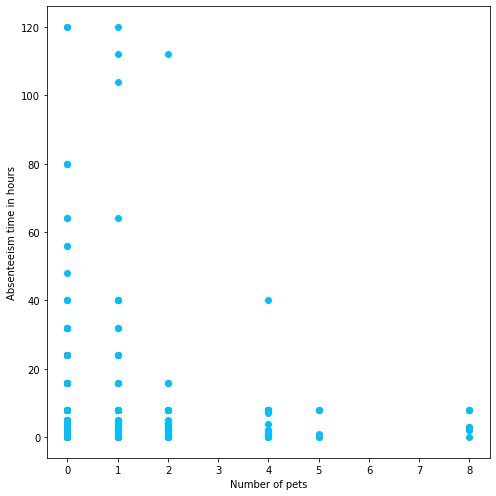

In [36]:
# relation between number of pets and absenteesim hours
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Pet'],df['Absenteeism time in hours'],color='deepskyblue')
ax.set(xlabel='Number of pets',
      ylabel='Absenteeism time in hours')
#save_figure(fig,'plots\pet-absentee-hours.png');

<AxesSubplot:>

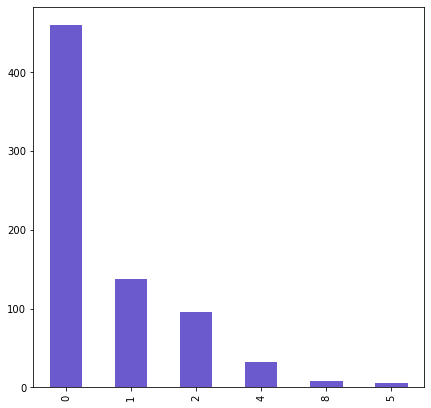

In [37]:
# pet distribution
plt.figure(figsize=(7,7))
df['Pet'].value_counts().plot.bar(color='slateblue')
#plt.savefig('plots\pet-distribution.png')

These plots show that most of the employees have no pets, but the employees who have more absentee hours are having less than 3 pets. This shows that there is an inverse relation between number of pets and absentee hours.

In [38]:
reasons = ['No reasons','Certain infectious and parasitic diseases','Neoplasms','Immunity affecting blood diseases','Endocrine, nutritional and metabolic diseases','Mental and behavioral disorders','Diseases of the nervous system','Diseases of the eye and adnexa','Diseases of the ear and mastoid process','Diseases of the circulatory system','Diseases of the respiratory system','Diseases of the digestive system','Diseases of the skin and subcutaneous tissue','Diseases of the musculoskeletal system and connective tissue','Diseases of the genitourinary system','Pregnancy, childbirth and the puerperium','Certain conditions originating in the perinatal period','Congenital malformations, deformations and chromosomal abnormalities','Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified','Injury, poisoning and certain other consequences of external causes','Factors influencing health status and contact with health services','Patient follow-up','Medical consultation','Blood donation','Laboratory examination','Unjustified absence','Physiotherapy','Dental Consultation']

In [39]:
df['Reason for absence'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

In [40]:
len(list(df['Reason for absence'].value_counts().index)),len(reasons)

(28, 28)

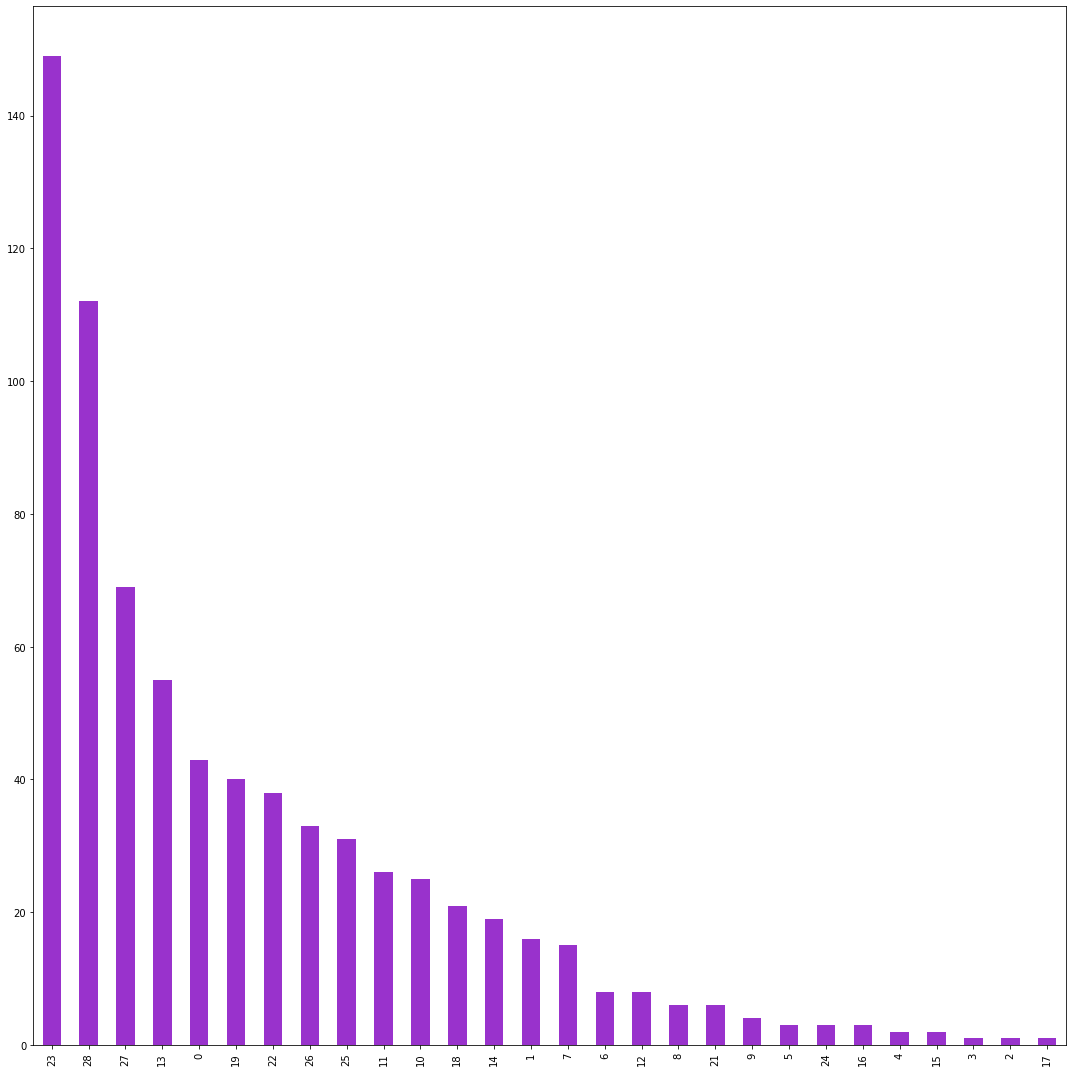

In [41]:
# disease distribution
fig,ax = plt.subplots(figsize=(15,15),tight_layout=True)
ax = df['Reason for absence'].value_counts().plot.bar(color='darkorchid')
#save_figure(fig,'reasons-distribution.png')

[Text(0.5, 0, 'Reason for absence'), Text(0, 0.5, 'Absenteeism time in hours')]

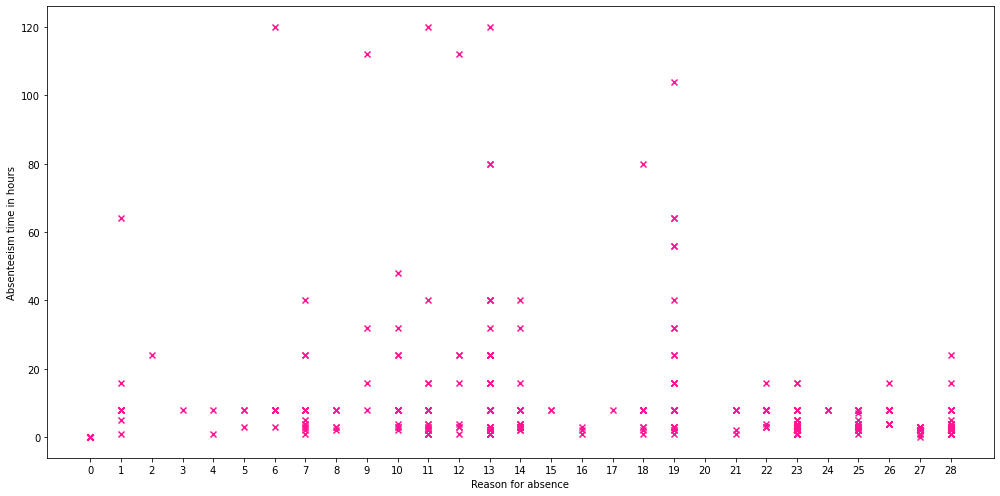

In [42]:
# relation between absentee hours and reason for absence
fig,ax = plt.subplots(figsize=(14,7),tight_layout=True)
ax.scatter(df['Reason for absence'],df['Absenteeism time in hours'],marker='x',color='deeppink')
ax.set_xticks(range(29))
ax.set(xlabel='Reason for absence',
      ylabel='Absenteeism time in hours')
#save_figure(fig,'plots\\reason-absentee-hour.png')

This clearly shows that for some specific set of disease the absentee hours are higher as compared to others.

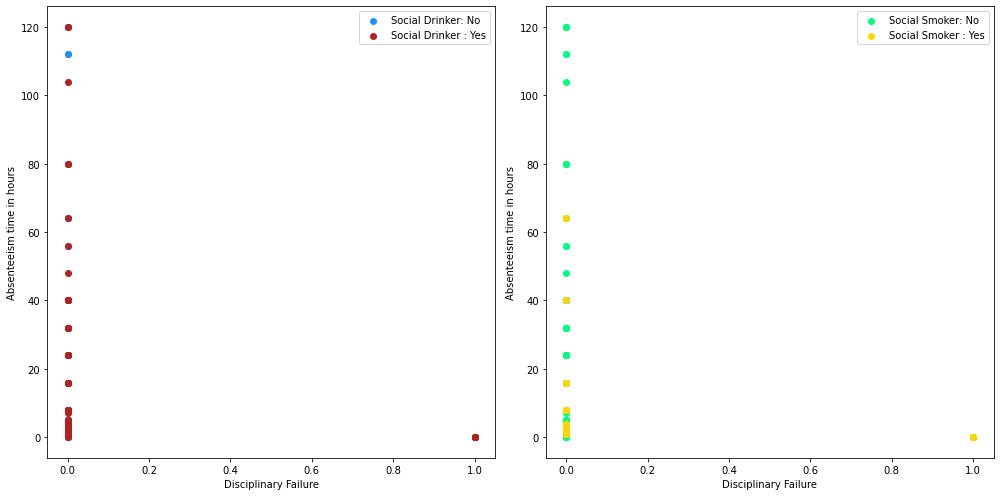

In [43]:
# relation between disciplinary failure and absenteeism hours w.r.t. drinking and smoking
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(14,7),tight_layout=True)
sd_n = ax0.scatter(df['Disciplinary failure'][df['Social drinker']==0],df['Absenteeism time in hours'][df['Social drinker']==0],color='dodgerblue')
sd_y = ax0.scatter(df['Disciplinary failure'][df['Social drinker']==1],df['Absenteeism time in hours'][df['Social drinker']==1],color='firebrick')
ax0.set(xlabel='Disciplinary Failure',
       ylabel='Absenteeism time in hours')
ax0.legend((sd_n,sd_y),('Social Drinker: No','Social Drinker : Yes'))
sm_n = ax1.scatter(df['Disciplinary failure'][df['Social smoker']==0],df['Absenteeism time in hours'][df['Social smoker']==0],color='springgreen')
sm_y = ax1.scatter(df['Disciplinary failure'][df['Social smoker']==1],df['Absenteeism time in hours'][df['Social smoker']==1],color='gold')
ax1.set(xlabel='Disciplinary Failure',
       ylabel='Absenteeism time in hours')
ax1.legend((sm_n,sm_y),('Social Smoker: No','Social Smoker : Yes'));
#save_figure(fig,'plots\\smoking-drinking-rel-discipline-absentee-hours.png')

<AxesSubplot:>

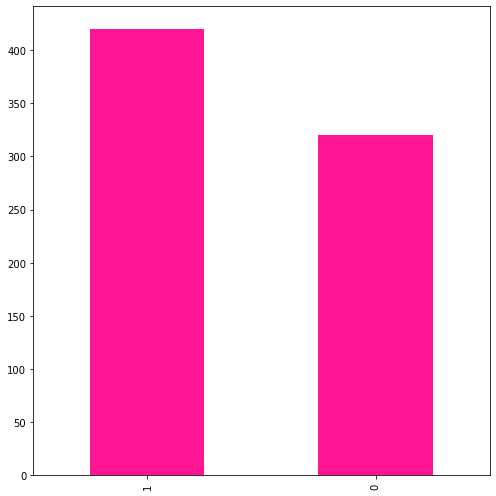

In [44]:
# bar graphs
plt.figure(figsize=(7,7),tight_layout=True)
df['Social drinker'].value_counts().plot.bar(color='deeppink')
#plt.savefig('plots\social-drinker-dist.png')

<AxesSubplot:>

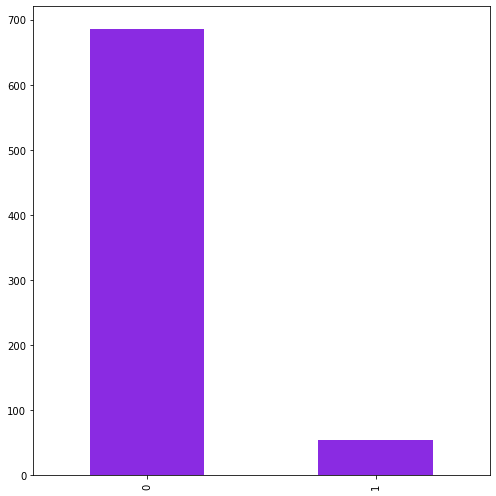

In [45]:
plt.figure(figsize=(7,7),tight_layout=True)
df['Social smoker'].value_counts().plot.bar(color='blueviolet')
#plt.savefig('plots\social-smoker-dist.png')

These plots show that most of the employees are social drinkers, while only few of them are social smokers. Also, disciplinary failure seems to be correlated to smoking and drinking, but that doesn't necesarily translate to high absentee hours.

[Text(0.5, 0, 'Social smoker(0:No,1:Yes)'),
 Text(0, 0.5, 'Absenteeism time in hours')]

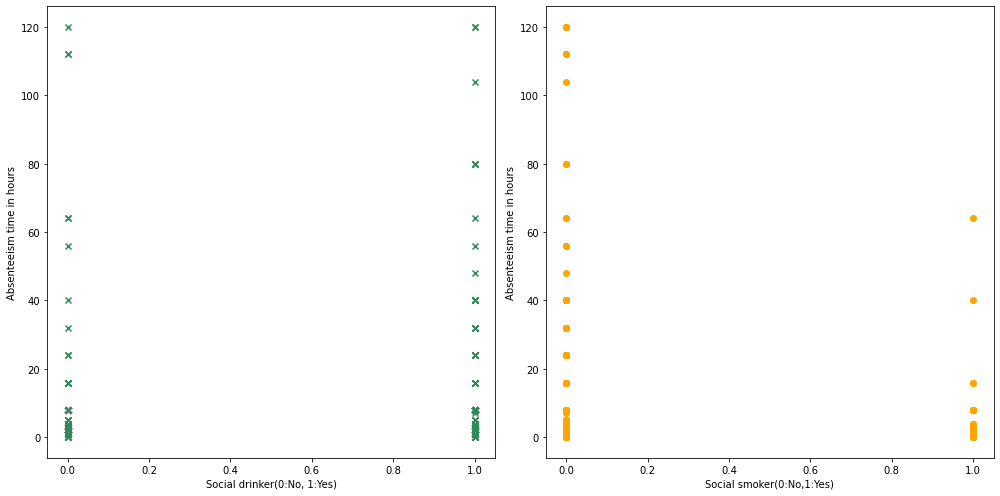

In [46]:
# direct relation of smoking and drinking to absentee hours
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(14,7),tight_layout=True)
ax0.scatter(df['Social drinker'],df['Absenteeism time in hours'],color='seagreen',marker='x')
ax0.set(xlabel='Social drinker(0:No, 1:Yes)',
       ylabel='Absenteeism time in hours')
ax1.scatter(df['Social smoker'],df['Absenteeism time in hours'],color='orange')
ax1.set(xlabel='Social smoker(0:No,1:Yes)',
       ylabel='Absenteeism time in hours')
#save_figure(fig,'plots\\smoking-drinking-absentee-hours.png')

These graphs show that being a drinker is a factor causing high absentee hours, while on the other hand, being a smoker is not.

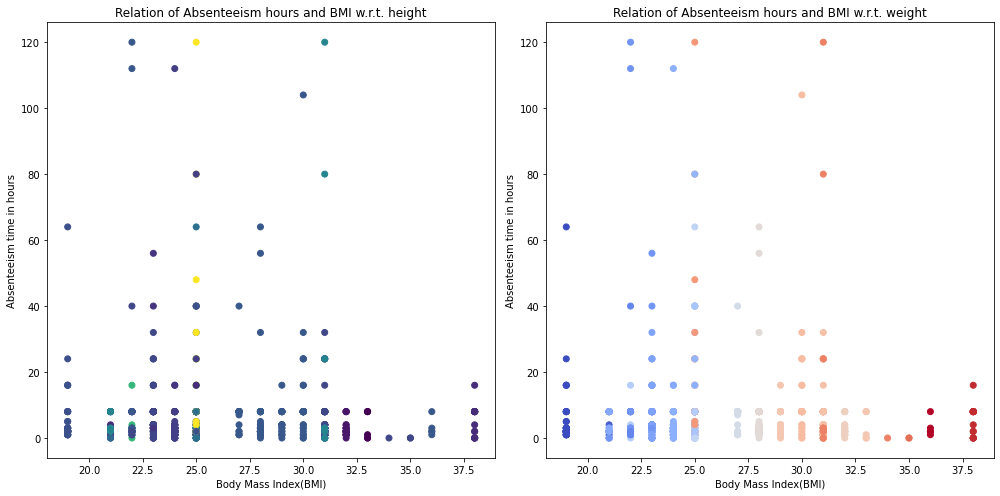

In [50]:
# relation of absentee hours with bmi, w.r.t height and weight
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(14,7),tight_layout=True)
ax0.scatter(df['Body mass index'],df['Absenteeism time in hours'],c = df['Height'],cmap='viridis')
ax0.set(title='Relation of Absenteeism hours and BMI w.r.t. height',
       xlabel='Body Mass Index(BMI)',
       ylabel='Absenteeism time in hours')
ax1.scatter(df['Body mass index'],df['Absenteeism time in hours'],c=df['Weight'],cmap='coolwarm')
ax1.set(title='Relation of Absenteeism hours and BMI w.r.t. weight',
        xlabel='Body Mass Index(BMI)',
        ylabel='Absenteeism time in hours')
save_figure(fig,'plots\\bmi-absentee-hours.png')

BMI doesn't show a clear trend, let's do it reverse.

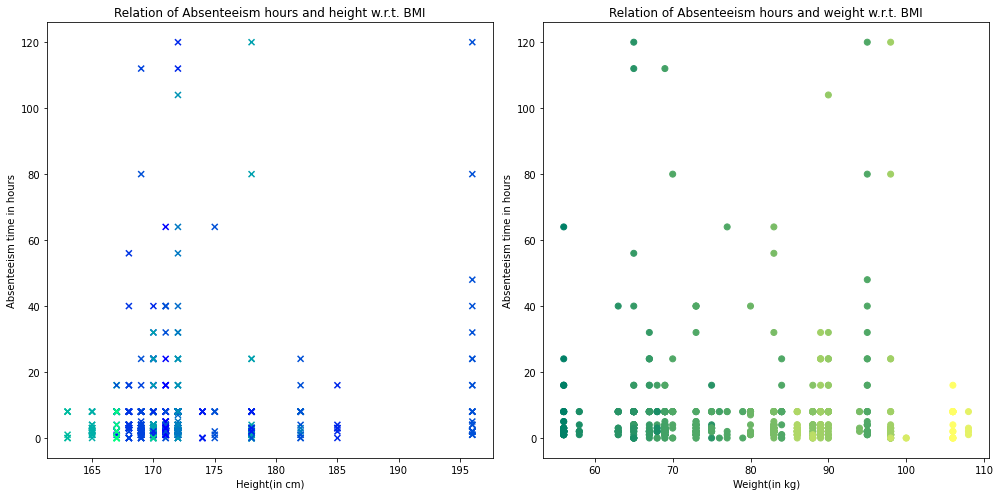

In [58]:
# relation of absentee hours with height and weight, w.r.t. bmi
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(14,7),tight_layout=True)
ax0.scatter(df['Height'],df['Absenteeism time in hours'],c = df['Body mass index'],cmap='winter',marker='x')
ax0.set(title='Relation of Absenteeism hours and height w.r.t. BMI',
       xlabel='Height(in cm)',
       ylabel='Absenteeism time in hours')
ax1.scatter(df['Weight'],df['Absenteeism time in hours'],c=df['Body mass index'],cmap='summer')
ax1.set(title='Relation of Absenteeism hours and weight w.r.t. BMI',
        xlabel='Weight(in kg)',
        ylabel='Absenteeism time in hours')
save_figure(fig,'plots\\height-weight-absentee-hours.png')

These plots show that employees who have low to medium BMI in general have more absents. In both figures, we can see that employees with high BMI don't have more absents, same can be said for very low BMI. But still, these plots are not very conclusive, so a curve of height and weight w.r.t. BMI will be more conclusive.

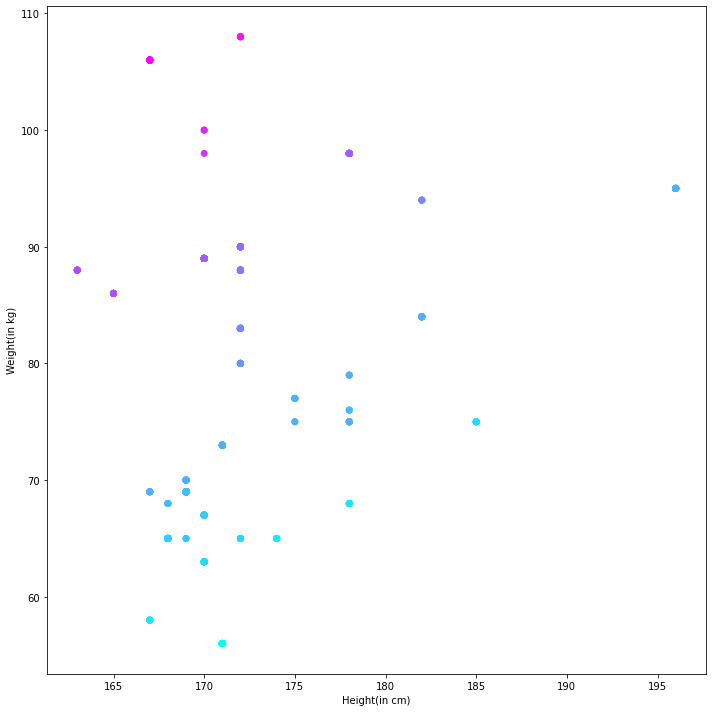

In [57]:
# relation b/w height and weight w.r.t. BMI
fig,ax = plt.subplots(figsize=(10,10),tight_layout=True)
ax.scatter(df['Height'],df['Weight'],c = df['Body mass index'],cmap='cool')
ax.set(xlabel='Height(in cm)',
      ylabel='Weight(in kg)')
save_figure(fig,'plots\\height-weight.png')

A lot of people have height in the range of 160-175 cms. In this range, almost all people of high and low BMI are present. Hence, people in this range of height who are overweight or underweight, have the most amount of absents.

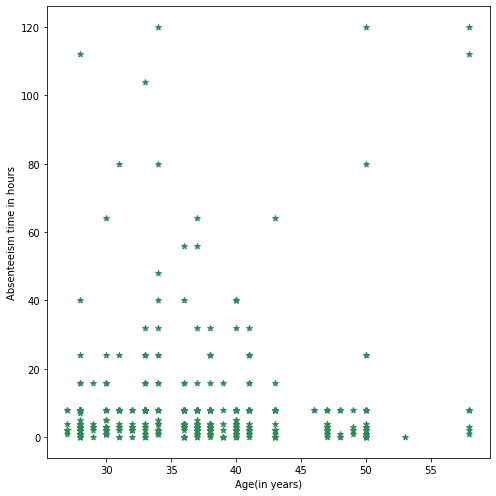

In [60]:
# relation of age and absentee hours
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Age'],df['Absenteeism time in hours'],color='seagreen',marker='*')
ax.set(xlabel='Age(in years)',
      ylabel='Absenteeism time in hours')
save_figure(fig,'plots\\age-absentee-hours.png')

A lot of employees who are under 40 years of age have significantly more absents. Let's see the relation between age and absenteeism hours with respect to weight.


[Text(0.5, 0, 'Age(in years)'), Text(0, 0.5, 'Absenteeism time in hours')]

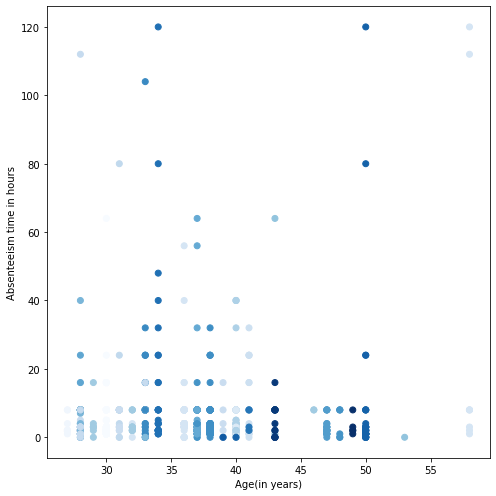

In [63]:
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Age'],df['Absenteeism time in hours'],c=df['Weight'],cmap='Blues')
ax.set(xlabel='Age(in years)',
      ylabel='Absenteeism time in hours')

In this plot, it is clearly seen that employees under the age of 40 years, who are either overweight or underweight have more absents. This validates of our previous conclusion related to height and weight. 

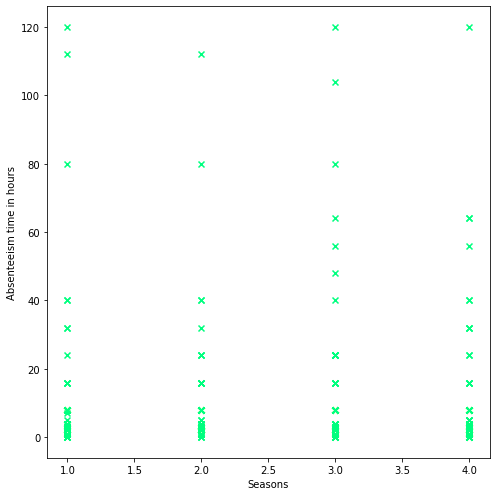

In [70]:
# relation of seasons and absentee hours
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Seasons'],df['Absenteeism time in hours'],color='springgreen',marker='x')
ax.set(xlabel='Seasons',
      ylabel='Absenteeism time in hours')
save_figure(fig,'plots\\seasons-absentee-hours.png')

The plot shows that absentee hours are at a high during summer and winter, suggesting a trend, which can be explained by the argument that summer and winter are usually vacation seasons, hence leading to high absentee hours.

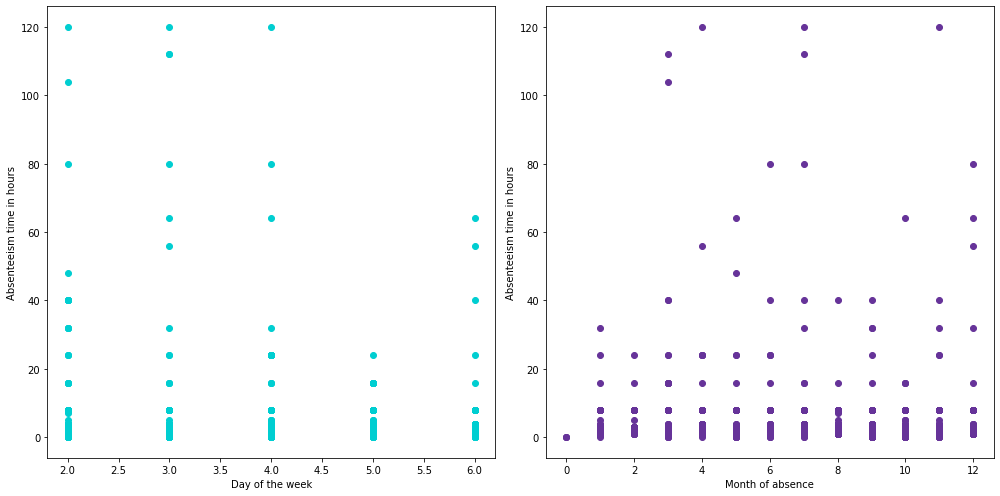

In [78]:
# for day and month
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(14,7),tight_layout=True)
ax0.scatter(df['Day of the week'],df['Absenteeism time in hours'],color='darkturquoise')
ax0.set(xlabel='Day of the week',
       ylabel='Absenteeism time in hours')
ax1.scatter(df['Month of absence'],df['Absenteeism time in hours'],color='rebeccapurple')
ax1.set(xlabel='Month of absence',
       ylabel='Absenteeism time in hours')
save_figure(fig,'plots\\day-month-absentee-hours.png')

In a week, most absents can be seen on the first three working day i.e. monday, tuesday and wednesday. For months, the same conclusion comes as seen in the seasons relation, that absentee hours are high during summer and winter months.

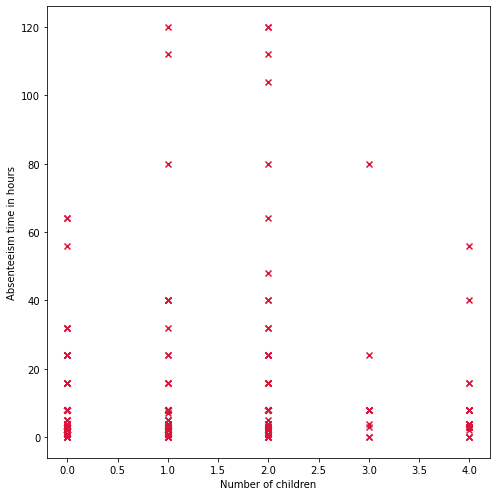

In [83]:
# relation between number of children and absentee hours
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Son'],df['Absenteeism time in hours'],marker='x',color='crimson')
ax.set(xlabel='Number of children',
      ylabel='Absenteeism time in hours')
save_figure(fig,'plots\\childern-absentee-hours.png')

This figure shows that people who have 1 or 2 children have higher absentee hours. Let's see the age of employees in this case as it will give an insight of how old their children are.

[Text(0.5, 0, 'Number of children'), Text(0, 0.5, 'Absenteeism time in hours')]

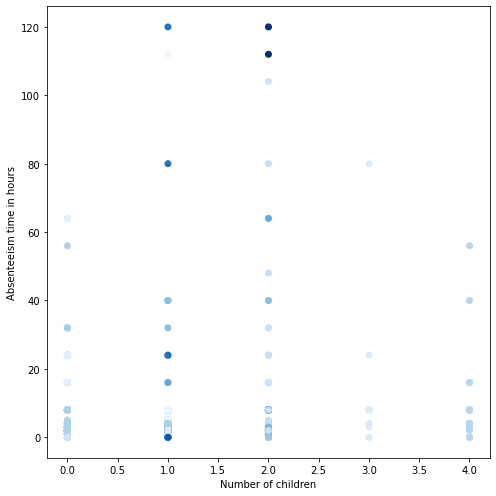

In [85]:
# relation of no of children and absentee hours w.r.t. age of employees
fig,ax = plt.subplots(figsize=(7,7),tight_layout=True)
ax.scatter(df['Son'],df['Absenteeism time in hours'],c=df['Age'],cmap='Blues')
ax.set(xlabel='Number of children',
      ylabel='Absenteeism time in hours')

In [93]:
df[(df['Son']==4)&(df['Age']>30)].head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
10,20,1,7,2,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,8
11,20,1,7,3,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,8
12,20,11,7,4,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,8
23,20,28,8,6,1,260,50,11,36,205.917,...,0,1,4,1,0,0,65,168,23,4


This shows that younger employees who have children have more absentee hours, as they might have to look after them more.

In [80]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749
